<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.3.0     ) [CRAN]
distribut... (NA -> 0.4.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.1     ) [CRAN]
abind        (NA -> 1.4-5     ) [CRAN]
posterior    (NA -> 1.6.0     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpxTDL9z/remotes1431d1721e2/stan-dev-cmdstanr-c549ae6/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpxTDL9z/remotes14382eefc7/rmcelreath-rethinking-f3ac8de/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.40.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.007425049,0.2113721,-0.3491536,0.3271565,1.004830,213.0080
b,1.069387198,0.2434381,0.6784319,1.4697326,1.005279,355.6198


# Chapter 11

## Easy

### 11E1
If an event has probability 0.35, what are the log-odds of this event?

#### Answer
We just need to definition of log odds.
> $\text{Odds} = \frac{p}{1-p}$

> $\text{log-Odds} = \text{ln}\left(\frac{p}{1-p}\right)$

So for our problem
> $\text{log-Odds}(0.35) = \text{ln}\left(\frac{0.35}{1-0.35}\right)
= \text{ln}\left(\frac{0.35}{0.65}\right) \approx -0.62$

In [ ]:
log(0.35 / (1-0.35))

[1] -0.6190392

### 11E2
If an event has log-odds 3.2, what is the probability of this event?

#### Answer
We can find this in R pretty easily:

In [ ]:
logistic(3.2)

[1] 0.9608343

But I think it's worth knowing to calculate this by hand.

> $\text{log-odds} = 3.2 = \text{ln}\left(\frac{p}{1-p}\right)
\rightarrow e^{3.2} = \frac{p}{1-p}
\rightarrow (1-p)e^{3.2} = e^{3.2} - pe^{3.2} = p
\rightarrow e^{3.2} = p + pe^{3.2} = p(1 + e^{3.2})
\rightarrow p = \frac{e^{3.2}}{1 + e^{3.2}} \approx 0.961 $

### 11E3
Suppose that a coefficient in a logistic regression has value 1.7. What does this imply about  the proportional change in odds of the outcome?

#### Answer
First on the *log-odds* scale, a coefficient of 1.7 means that the log-odds increases *additively* by 1.7 for a one-unit increase in the corresponding predictor variable: $\text{ln}\left(\frac{p}{1-p}\right) = ... + 1.7x$.  To get this to the *odds* scale, we exponentiate both sides: $\frac{p}{1-p} = ... \times e^{1.7x}$ such that the odds increase *multiplicatively* by $e^{1.7}$ for a one-unit increase in $x$.

### 11E4
Why do Poisson regressions sometimes require the use of an *offset*?  Provide an example.

#### Answer
In short, an offset is required when the outcome is something like a rate--a fraction where the numerator is the number of events and the denominator is something like attempts, space, time, or exposure--where the value of the denominator may vary among observations.  In this case, our model might look like

$$g\left(\frac{y}{m}\right) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

The problem is that we don't have a GLM that can accomodate fractional outcomes.  But say we take $g(.)$ to be $\text{ln}(.)$; then we have

$$\text{ln}\left(\frac{y}{m}\right) = \text{ln}(y) - \text{ln}(m) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$.

Now we can take $\text{ln}(m)$ over to the other side to get

$$\text{ln}(y) = \text{ln}(m) + \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

where $\text{ln}(m)$ is the offset.  So what we're left with is a Poisson regression with an offset.

## Medium

### 11M1
As explained in the chapter, binomial data can be organized in aggregated and disaggregated  forms, without any impact on inference. But the likelihood of the data does change when the data are  converted between the two formats. Can you explain why?

#### Answer
From the chimpanzee example in the chapter, aggregated data may look like

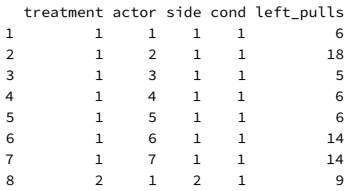

where the outcome `left_pulls` is a sum of "successes" across trials.  Conversely, disaggregated data may look like

|treatment|actor|side|cond|left_pull|
|---------|-----|----|----|---------|
|1|1|1|1|0|
|1|1|1|1|0|
|1|1|1|1|1|
|...|...|...|...|...|
|2|7|2|4|1|

where each trial is described on a single line.

These data formats require different likelihoods.  Both can use binomial likelihoods, but the aggregated data must account for the fact that multiple trials are represented in a single row like `left_pulls ~ dbinom(18, p)`, while the disaggregated data does not (`left_pull ~ dbinom(1, p)`).  In math notation, the disaggregated likelihood looks like $p^y(1-p)^{1-y}$ while the aggregated likelihood looks like $\frac{y!}{y!(n-y)!}p^y(1-p)^{n-y}$ $y$ is the outcome and $n=18$ is the number of trials.

### 11M2
If a coefficient in a Poisson regression has value 1.7, what does this imply about the change in the outcome?

#### Answer
Let's get aquainted with the Poisson regression; for illustration, we'll assume a single intercept and a single explanatory variable $X$:
$$ y \sim Poisson(\lambda)$$
$$ \text{ln}(\lambda) = \alpha + \beta x$$

So we can rewrite the linear model as
$$ \lambda = \text{exp}(\alpha + \beta x) = e^\alpha e^{\beta x}$$

So what happens to $\lambda$ when $x$ increases by 1 unit?  How does $\lambda_{x+1}$ compare with $\lambda_x$?
$$\frac{\lambda_{x+1}}{\lambda_x} = \text{exp}[(\alpha + \beta (x+1)) - (\alpha + \beta x)] = \frac{\text{exp}(\alpha + \beta (x+1))}{\text{exp}(\alpha + \beta x)} = \frac{e^\alpha e^{\beta (x+1)}}{e^\alpha e^{\beta x}} = \frac{e^{\beta x+ \beta}}{e^{\beta x}} = \frac{e^{\beta x} e^{\beta}}{e^{\beta x}} = e^\beta$$

Thus, a 1-unit change in $X$ results in an $e^\beta$ change in $\lambda_{x+1}$ compared to $\lambda_x$.  Here, if $\beta = 1.7$, there is proportional change to $\lambda_{x+1}$ of $e^{1.7} \approx 5.47$

### 11M3 and 11M4
Explain why the logit link is appropriate for a binomial generalized linear model.

Explain why the log link is appropriate for a Poisson generalized linear model.

#### Answers
Logistic regression is generally used to model parameters, $p$, that is constrained between [0,1].  The logit link, $\text{ln}\frac{p}{1-p}$, achieves this by mapping values of our linear function $X \beta$ to values of [0,1].

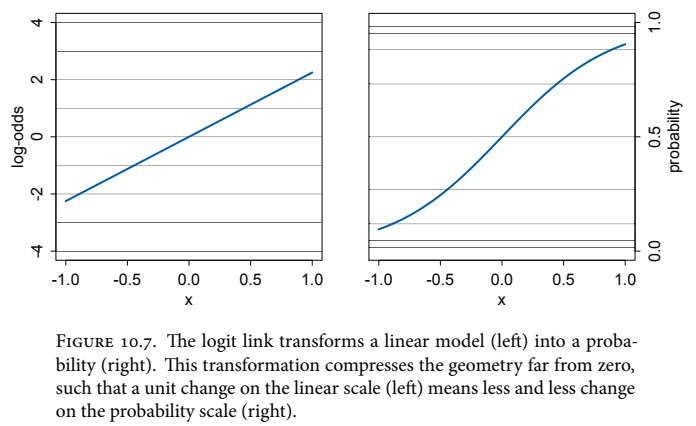

Similarly, Poisson regression is used to model parameters, $\lambda$, that are non-negative.  The log link function, $\text{ln}(\lambda)$ achieves this by mapping values of our linear function $X\beta$ to values $\ge 0$.

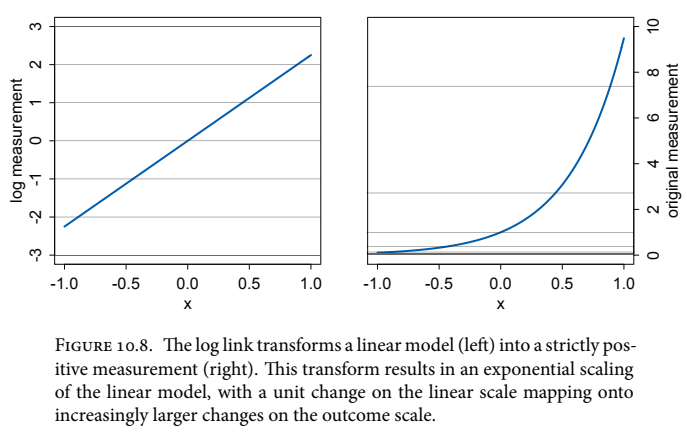

### 11M5
What would it imply to use a logit link for the mean of a Poisson generalized linear model?  Can you think of a real research problem for which this would make sense?

#### Answer
Let's first see what such a model would look like:

$$y \sim Poisson(\lambda)$$
$$\text{logit}(\lambda) = \text{ln}\frac{\lambda}{1 - \lambda} = X\beta$$

This would imply that the expected value of $y$, $\lambda$, would be bound between [0,1].

To be honest, I cannot think of a reason that this would be used in practice...

### 11M6
State the constraints for which the binomial and Poisson distributions have maximum entropy. Are the constraints different at all for binomial and Poisson? Why or why not?

#### Answer
I'm working on a writeup about MaxEnt.  The basic idea of MaxEnt is to maximize entropy

$$H = -\sum_{i=1}^n p(x_i) \times \text{ln}(p(x_i))$$

subject to some set of constraints, where each constraint $c$ is expressed like

$$c_m: E[g_m(X)] = \sum_a^b p(x_i) g_m(x_i) \ \text{or} \ \int_a^b p(x) g_m(x) dx$$

One of these constraints is always

$$c_1: \sum_{x=-\infty}^{\infty} p(x) = 1 \ \text{or} \ \int_{x=-\infty}^{\infty} p(x) \ dx = 1$$

which is just a fact about probability: *total probability always sums to 1*.  Here, $g_m(X) = 1$.

If we assume that $X$ is a discrete variable that is $\ge 0$, which is the case for both binomial and Poisson distributions, we can rewrite

$$c_1: \sum_{x=0}^{\infty} p(x) = 1$$

Since the binomial distribution only includes values of 0 or 1, we can rewrite

$$c_1^{\text{binomial}}: \sum_{x=0}^{1} p(x) = 1 , \ c_1^{\text{Poisson}}: \sum_{x=0}^{\infty} p(x) = 1$$

If we can assume that the distribution has a mean, we can impose a second constraint

$$c_2: \sum_{i=1}^n p(x_i) \times x_i = \bar{X}$$

which is just the definition of the arithmetic mean.  The binomial distibution has $\bar{X}_{\text{binomial}} = np$ while the Poisson distribution has $\bar{X}_{\text{Poisson}} = \lambda$.  Actually, as $n$ gets large, $\lambda \approx np$.  So the two distributions are closely related.

Without getting too far into the math, these terms get wrapped up into an expression called the [Lagrangian](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction) like

$$𝓛 = H - \phi \left(\sum_{x=0}^{\infty} p(x) - 1 \right) - \psi \left(\sum_{i=1}^n p(x_i) \times x_i - \bar{X} \right)$$

where $\phi$ and $\psi$ are "Lagrange multipliers".  For each $n$ Lagrangians, we solve for $p(x_i)$ by taking all partial derivatives of $𝓛$ with respect to $p(x_i)$ and setting equal to 0; $\phi$ and $\psi$ can be found along the way. The outcome of this, given our constraints, are the binomial and Poisson distributions.

Importantly, notice that all of this implies that each observation $x_i$ is independent, and $p(X=x)$ is constant across trials.

### 11M7

Use `quap` to construct a quadratic approximate posterior distribution for the chimpanzee model that includes a unique intercept for each actor, `m11.4` (page 330). Compare the quadratic approximation to the posterior distribution produced instead from MCMC. Can you explain both the differences and the similarities between the approximate and the MCMC distributions? Relax the  prior on the actor intercepts to Normal(0,10). Re-estimate the posterior using both `ulam` and `quap`. Do the differences increase or decrease? Why?

#### Answer
Let's prepare the data first.

In [ ]:
data(chimpanzees)
d <- chimpanzees
d$treatment <- 1 + d$prosoc_left + 2*d$condition
dat_list <- list(pulled_left = d$pulled_left,
                 actor = d$actor,
                 treatment = as.integer(d$treatment))

Now we'll run the `ulam` and `quap` versions of the model from the chapter.

In [ ]:
m11.4_ulam <- ulam(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list,
     chains=4,
     cores=4)

m11.4_quap <- quap(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list)

  cbind(round(precis(m11.4_ulam, depth=2),2)[,1:2],
      round(precis(m11.4_quap, depth=2),2)[1:2])

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 4

,mean,sd,mean,sd
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.41,0.32,-0.44,0.33
a[2],3.92,0.74,3.71,0.72
a[3],-0.73,0.33,-0.73,0.33
a[4],-0.73,0.33,-0.73,0.33
a[5],-0.42,0.33,-0.44,0.33
a[6],0.51,0.33,0.47,0.33
a[7],1.98,0.41,1.91,0.41
b[1],-0.07,0.28,-0.04,0.28
b[2],0.46,0.28,0.47,0.28


The differences are negligible, but there *are* differences.  Some of this will have to do with the randomness in the run of the models.  But some almost has to do with the fact that quadratic approximation, `quap`, is confined to using a normal distribution to model `logit(p)`.

These differences are made more obvious when we set `a[actor] ~ dnorm(0,10)`.

In [ ]:
m11.4_ulamb <- ulam(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 10),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list,
     chains=4,
     cores=4)

m11.4_quapb <- quap(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 10),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list)

  cbind(round(precis(m11.4_ulamb, depth=2),2)[,1:2],
      round(precis(m11.4_quapb, depth=2),2)[1:2])

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 5

,mean,sd,mean,sd
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.36,0.35,-0.35,0.35
a[2],11.22,5.29,6.99,3.55
a[3],-0.68,0.35,-0.65,0.35
a[4],-0.67,0.35,-0.65,0.35
a[5],-0.35,0.35,-0.35,0.35
a[6],0.59,0.36,0.58,0.35
a[7],2.20,0.47,2.12,0.45
b[1],-0.15,0.30,-0.14,0.30
b[2],0.39,0.30,0.38,0.30


There is only 1 term that is very different, `a[2]`.  Why does the looser prior lead to this?  Because the more-permissve prior now entertains extreme values.  On the logit scale, extreme values skew to larger values; but for the normal distribution, the increased variance is spread evenly around the mean.

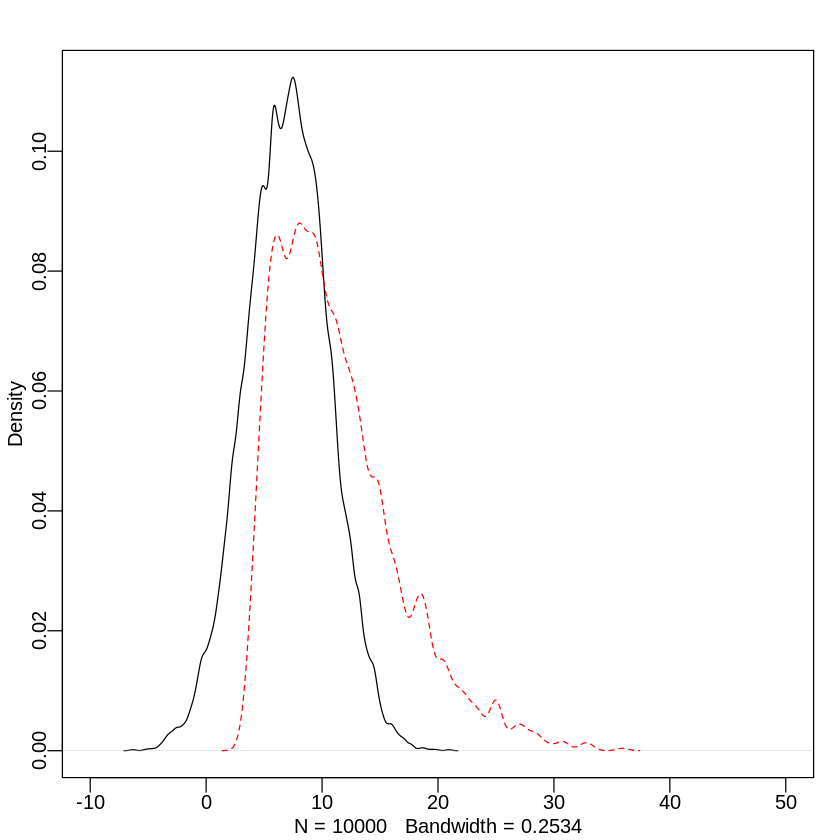

In [ ]:
post_ulam <- extract.samples(m11.4_ulamb)
post_quap <- extract.samples(m11.4_quapb)

dens(post_quap$a[,2], xlim=c(-10, 50))
dens(post_ulam$a[,2], col="red", lty=2, add=TRUE)

### 11M8
Revisit the `data(Kline)` islands example. This time drop Hawaii from the sample and refit the models. What changes do you observe?

#### Answer
Let's start by getting the original output on the full dataset.

In [ ]:
data(Kline)
d <- Kline
d$P <- standardize(log(d$population))
d$contact_id <- ifelse(d$contact=="high", 2, 1)

d_list <- list(T = d$total_tools,
               P = d$P,
               cid = d$contact_id)

m11.10 <- ulam(
  alist(
    T ~ dpois(lambda),
      log(lambda) <- a[cid] + b[cid]*P,
        a[cid] ~ dnorm(3, 0.5),
        b[cid] ~ dnorm(0, 0.2)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Now we'll get the truncated dataset and run the model on that.

In [ ]:
data(Kline)
d <- Kline
d2 <- d[d$culture != "Hawaii", ]
d2$P <- standardize(log(d2$population))
d2$contact_id <- ifelse(d2$contact=="high", 2, 1)

d2_list <- list(T = d2$total_tools,
                P = d2$P,
                cid = d2$contact_id)

m11.10b <- ulam(
  alist(
    T ~ dpois(lambda),
      log(lambda) <- a[cid] + b[cid]*P,
        a[cid] ~ dnorm(3, 0.5),
        b[cid] ~ dnorm(0, 0.2)
  ), data=d2_list,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Now let's plot these with the same code used in the book.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



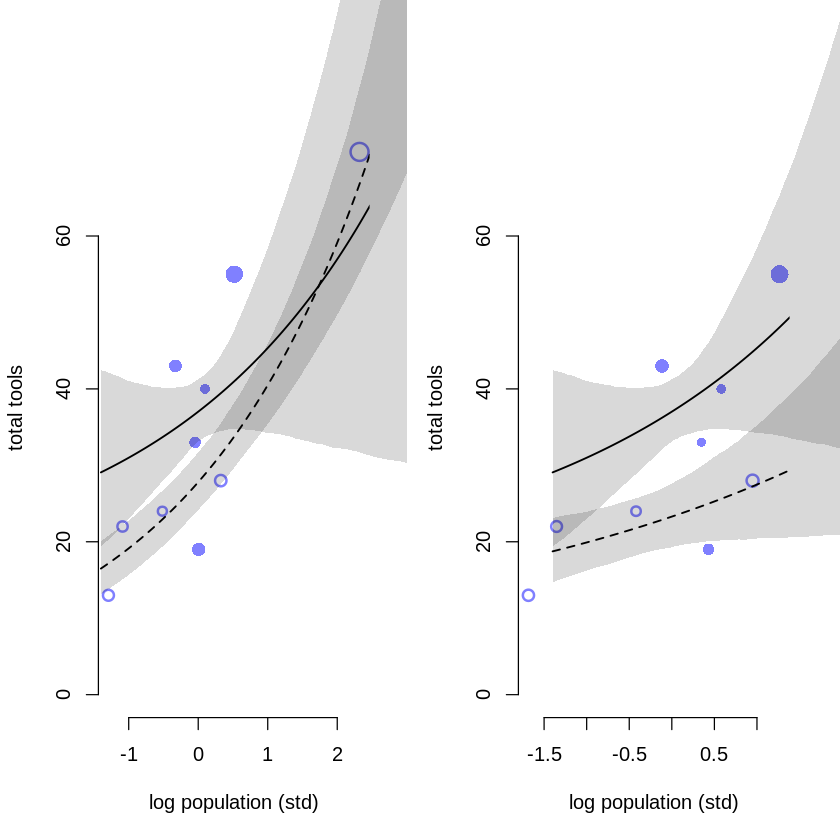

In [ ]:
par(mfrow=c(1,2))

k1 <- PSIS( m11.10, pointwise=TRUE )$k
plot(d_list$P, d_list$T,
     xlab="log population (std)", ylab="total tools",
     col=rangi2, pch=ifelse(d_list$cid==1, 1, 16), lwd=2, cex=1+normalize(k1),
     ylim=c(0,75), bty="n")

#set up the horizontal axis values to compute predictions at
ns <- 100
P_seq <- seq(from=-1.4, to=3, length.out=ns)

#predictions for cid=1 (low contact)
lambda <- link(m11.10, data=data.frame(P=P_seq, cid=1))
lmu <- apply(lambda, 2, mean)
lci <- apply(lambda, 2, PI)
lines(P_seq, lmu, lty=2, lwd=1.5)
shade(lci, P_seq, xpd=TRUE)

#predictions for cid=2 (high contact)
lambda <- link(m11.10, data=data.frame( P=P_seq, cid=2))
lmu <- apply( lambda, 2, mean)
lci <- apply( lambda, 2, PI)
lines( P_seq, lmu, lty=1, lwd=1.5)
shade( lci, P_seq, xpd=TRUE)

################################################################################
k2 <- PSIS(m11.10b, pointwise=TRUE )$k
plot(d2_list$P, d2_list$T,
     xlab="log population (std)", ylab="total tools",
     col=rangi2, pch=ifelse(d2_list$cid==1, 1, 16), lwd=2, cex=1+normalize(k2),
     ylim=c(0,75), bty="n")

#set up the horizontal axis values to compute predictions at
ns <- 100
P_seq <- seq(from=-1.4, to=3, length.out=ns)

#predictions for cid=1 (low contact)
lambda <- link(m11.10b, data=data.frame(P=P_seq, cid=1))
lmu <- apply(lambda, 2, mean)
lci <- apply(lambda, 2, PI)
lines(P_seq, lmu, lty=2, lwd=1.5)
shade(lci, P_seq, xpd=TRUE)

#predictions for cid=2 (high contact)
lambda <- link(m11.10, data=data.frame( P=P_seq, cid=2))
lmu <- apply( lambda, 2, mean)
lci <- apply( lambda, 2, PI)
lines( P_seq, lmu, lty=1, lwd=1.5)
shade( lci, P_seq, xpd=TRUE)

The major difference seems to be that the slope `b[cid]` is not as different between the low- vs high-contact islands, and maybe of opposite ranks.  Let's confirm this with `precis`

In [ ]:
round(precis(m11.10, depth=2),2)
round(precis(m11.10b, depth=2),2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],3.32,0.09,3.18,3.46,1,2104.69
a[2],3.61,0.07,3.50,3.72,1,2190.99
b[1],0.38,0.05,0.29,0.46,1,1933.68
b[2],0.19,0.16,-0.07,0.44,1,2240.00


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],3.14,0.11,2.96,3.32,1.01,1373.02
a[2],3.51,0.10,3.35,3.67,1.00,1166.76
b[1],0.16,0.09,0.00,0.31,1.00,1301.04
b[2],0.21,0.12,0.02,0.41,1.00,1119.94


## Hard

### 11H1
Use WAIC or PSIS to compare the chimpanzee model that includes a unique intercept for each actor, `m11.4` (page 330), to the simpler models fit in the same section. Interpret the results.

#### Answer
Let's copy and paste the data-prep and all models from the chapter.

In [7]:
data(chimpanzees)
d <- chimpanzees
d$treatment <- 1 + d$prosoc_left + 2*d$condition
dat_list <- list(pulled_left = d$pulled_left,
                 actor = d$actor,
                 treatment = as.integer(d$treatment))

m11.1 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a,
        a ~ dnorm(0, 10)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.2 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a + b[treatment],
        a ~ dnorm(0, 1.5),
        b[treatment] ~ dnorm(0, 10)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.3 <- ulam(
alist(
  pulled_left ~ dbinom(1, p),
    logit(p) <- a + b[treatment],
      a ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.4 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteratio

In [8]:
compare(m11.1, m11.2, m11.3, m11.4, func=PSIS)
compare(m11.1, m11.2, m11.3, m11.4, func=WAIC)

,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m11.4,531.9557,18.948758,0.0000,NA,8.2953795,1.000000e+00
m11.3,682.4291,9.231043,150.4735,18.42901,3.6121932,2.113984e-33
m11.2,683.0913,9.635207,151.1356,18.47345,4.0185199,1.518168e-33
m11.1,687.8960,7.125581,155.9404,18.95736,0.9779628,1.373985e-34


,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m11.4,531.9045,18.927284,0.0000,NA,8.2698158,1.000000e+00
m11.3,682.4072,9.221572,150.5027,18.42643,3.6012224,2.083359e-33
m11.2,683.0652,9.625205,151.1607,18.47086,4.0054812,1.499271e-33
m11.1,687.8898,7.118391,155.9853,18.95470,0.9748543,1.343476e-34


The model that includes both `actor`-specific and `treatment`-specific terms has superior scores.  This is interesting because this is also the most-penalized model for being the complex; apparently, the complexity is well compensated by predictive ability of the model.